# Move Files in Downloads Automatically

### Reference: [Watchdog Source Code](https://pythonhosted.org/watchdog/index.html)

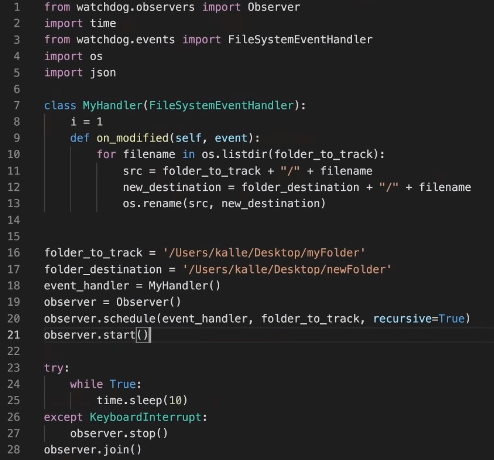

### Reference: [watchdog.events.FileSystemEventHandler Documentation](https://pythonhosted.org/watchdog/_modules/watchdog/events.html#FileSystemEventHandler)

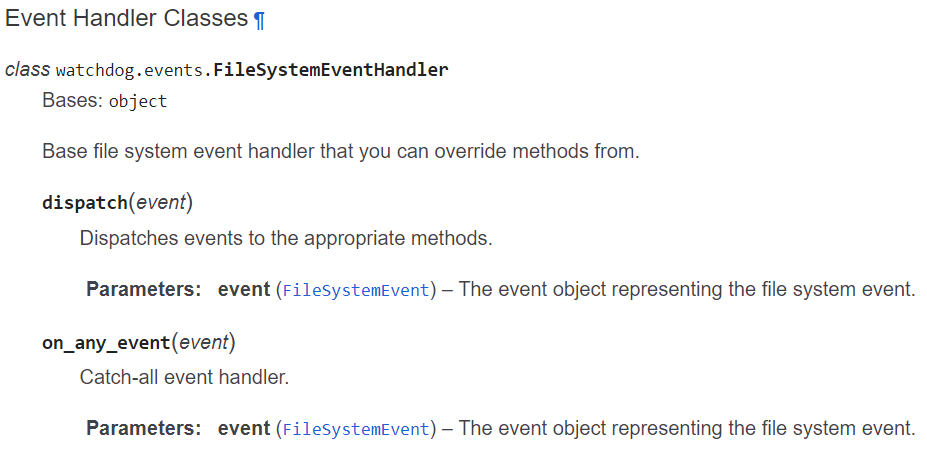

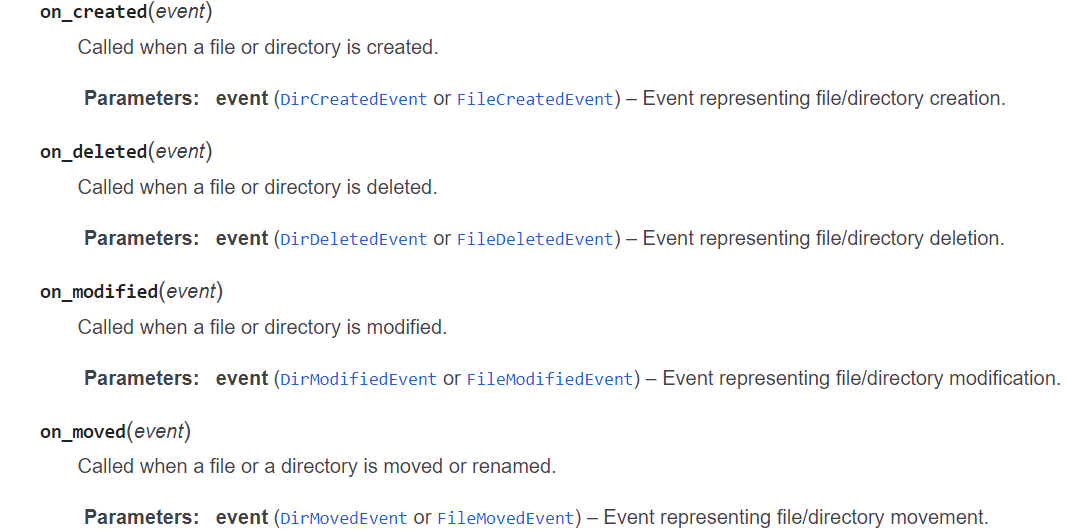

In [1]:
# THOUGHTS

# Create folders for differnent file extentions (manually in the Download folder)
#     eg. documents: txt, docx, pdf, pptx
#         spreadsheets: csv, xlsx, xlsm
#         pictures: png, jpg, gif
#         compressed files: rar, zip
#         Others:

# Detect if a new file comes into the Download file
    # Use the functionality of watchdog

# Move the file to the corresponding folder according to its file extension

In [2]:
import time
import os
import shutil
from watchdog.observers import Observer
from watchdog.events import FileSystemEventHandler        

folder_to_watch = '/Users/User/Downloads'
dest_folder = None
classifier = {'documents': ['.txt', '.docx', '.pdf', '.pptx'],
                'spreadsheets': ['.csv', '.xlsx', '.xlsm'],
                'pictures': ['.png', '.jpg', '.gif'],
                'compressed files': ['.rar', '.zip']
             }

In [3]:
def get_key_by_value(ext):
    for key, value in classifier.items():
        for v in value:
            if ext == v:
                return key

def check_in_classifier_values(ext):
    for value_list in classifier.values():
        for items in value_list:
            if ext == items:
                return True
    return False
    
def on_created(event):
    msg = f"hey, {event.src_path} has been created!\n"
    with open('Downloads Manager Events.txt', 'a') as f:
        f.write(msg)
    print(msg)

def on_deleted(event):
    msg = f"what the f**k! Someone deleted {event.src_path}!\n"
    with open('Downloads Manager Events.txt', 'a') as f:
        f.write(msg)
    print(msg)

def on_modified(event):
    msg = f"hey buddy, {event.src_path} has been modified!\n"
    with open('Downloads Manager Events.txt', 'a') as f:
        f.write(msg)
    print(msg)
    
    # When a file is downloaded...
    for filename in os.listdir(folder_to_watch):
        
        # determine the source file to move
        src_file_path = folder_to_watch + '/' + filename
        
        # determine the folder to move to
        ext = os.path.splitext(src_file_path)[-1]
        if ext == '.tmp' or ext == '.crdownload':
            break        
        
        if check_in_classifier_values(ext):
            dest_folder = '/Users/User/Desktop/下載/' + str(get_key_by_value(ext))
            print(f'The dest_folder is {dest_folder}')
        else:
            dest_folder = '/Users/User/Desktop/下載/others'
        dest_file_path = dest_folder + '/' + filename
        
        # move the file to the folder
        try:
            os.rename(src_file_path, dest_file_path)
            
        except FileExistsError: # 撞名
            print('當檔案已存在時，無法建立該檔案。')
            # 檔案會被留在原來的 Downloads 檔案夾中
            
        except PermissionError:
            print('無法存取檔案，可能是因為檔案正由另一個程序使用。')
            # 檔案會被留在原來的 Downloads 檔案夾中

def on_moved(event):
    msg = f"ok ok ok, someone moved {event.src_path} to {event.dest_path}!\n"
    with open('Downloads Manager Events.txt', 'a') as f:
        f.write(msg)
    print(msg)

# Create a handler object to handle file events
my_event_handler = FileSystemEventHandler()

# Overriding the class instance functions
my_event_handler.on_created = on_created
my_event_handler.on_deleted = on_deleted
my_event_handler.on_modified = on_modified
my_event_handler.on_moved = on_moved

### The schedule method (for Observer)
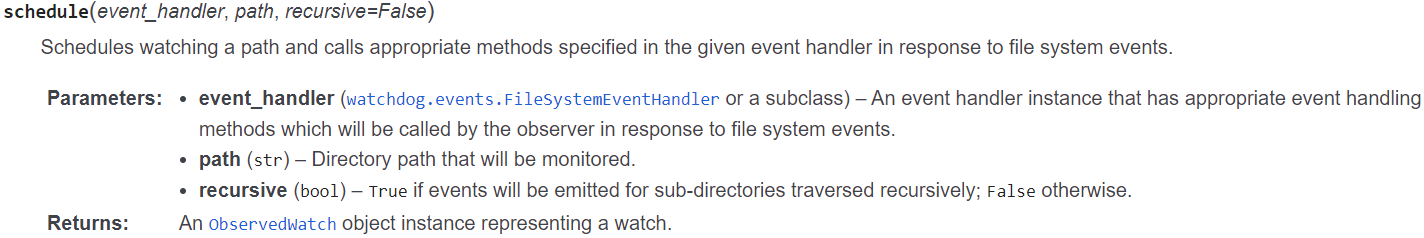

In [ ]:
# Create an Observer, which will monitor our filesystem and look for changes that will be handled by my_event_handler
my_observer = Observer()

# Allow my_observer to schedule the watching of folder_to_watch, with my_event_handler waiting to handle events if necessary
my_observer.schedule(my_event_handler, folder_to_watch, recursive=True)
    # my_event_handler: the event handler that will handle the event
    # folder_to_watch: the path to be monitored
    # recursive: a boolean that allow me to catch all the event that occurs even in the sub directories of my current directory.

    #  watchdog主要採用觀察者模型，主要有三個角色：observer，event_handler，被監控的文件夾。
    #  三者原本是獨立的，主要通過observer.schedule函數將三者串起來，意思為：
    #  observer不斷檢測調用平臺依賴代碼對監控文件夾進行變動檢測，當發現改變時，通知event_handler處理。


# start the observer thread
my_observer.start()

try:
    while True:
        time.sleep(1)
except KeyboardInterrupt: # KeyboardInterrupt = Ctrl + 'c', 中斷程序
    my_observer.stop() # signal the thread to stop

my_observer.join() # Block until the thread terminates

what the f**k! Someone deleted /Users/User/Downloads\photo.jpg!

hey, /Users/User/Downloads\8f214b34-ff15-4186-b2f7-5a37e4212c41.tmp has been created!

hey buddy, /Users/User/Downloads\8f214b34-ff15-4186-b2f7-5a37e4212c41.tmp has been modified!

hey buddy, /Users/User/Downloads\8f214b34-ff15-4186-b2f7-5a37e4212c41.tmp has been modified!

hey, /Users/User/Downloads\photo.jpg has been created!

what the f**k! Someone deleted /Users/User/Downloads\photo.jpg!

ok ok ok, someone moved /Users/User/Downloads\8f214b34-ff15-4186-b2f7-5a37e4212c41.tmp to /Users/User/Downloads\photo.jpg.crdownload!

ok ok ok, someone moved /Users/User/Downloads\photo.jpg.crdownload to /Users/User/Downloads\photo.jpg!

hey buddy, /Users/User/Downloads\photo.jpg has been modified!

The ext is .jpg
True
The dest_folder is /Users/User/Desktop/下載/pictures
當檔案已存在時，無法建立該檔案。
hey buddy, /Users/User/Downloads\photo.jpg has been modified!

The ext is .jpg
True
The dest_folder is /Users/User/Desktop/下載/pictures
無法存取檔案，可能是因為檔